In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/yarra-traffic-counts.csv')
df.head()

,date_captured,road_name,section_start,section_end,suburb,direction_1,vehicles_1,direction_2,vehicles_2,volume_per_day,85th_percentile_speed
0,2015-Jan,Butler Street,Jonas Street,Shelley Street,Richmond,East/North,192,West/South,261,453,28.4
1,2015-Jan,Rae Street,Liverpool Street,Scotchmer Street,Fitzroy North,East/North,1115,West/South,784,1899,40.7
2,2015-Jan,Rae Street,Reid Street,Scotchmer Street,Fitzroy North,East/North,955,West/South,1531,2486,40.7
3,2015-Jan,Shelley Street,Butler Street,Victoria Street,Richmond,East/North,1659,West/South,1638,3297,35.3
4,2010-Jan,Hood Street,Hoddle Street,Islington Street,Collingwood,East/North,438,West/South,12,450,32.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date_captured          1521 non-null   object 
 1   road_name              1521 non-null   object 
 2   section_start          1521 non-null   object 
 3   section_end            1515 non-null   object 
 4   suburb                 1521 non-null   object 
 5   direction_1            1521 non-null   object 
 6   vehicles_1             1521 non-null   int64  
 7   direction_2            1521 non-null   object 
 8   vehicles_2             1521 non-null   int64  
 9   volume_per_day         1521 non-null   int64  
 10  85th_percentile_speed  1521 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 130.8+ KB


In [ ]:
df.describe()

,vehicles_1,vehicles_2,volume_per_day,85th_percentile_speed
count,1521.000000,1521.000000,1521.000000,1521.000000
mean,1000.863248,1003.417488,2004.280736,37.780237
std,1400.111989,1446.280627,2718.209947,6.893218
min,0.000000,0.000000,6.000000,14.000000
25%,214.000000,187.000000,480.000000,34.200000
50%,495.000000,483.000000,975.000000,38.200000
75%,1080.000000,1072.000000,2030.000000,41.900000
max,12068.000000,12497.000000,23457.000000,79.500000


In [ ]:
print('Road_Name:\n')
# df['road_name'].value_counts()[:10].plot(kind='barh')
df['road_name'].value_counts()[:10].to_frame().style.bar()

Road_Name:



,road_name
Wellington Street,33
Park Street,30
Rae Street,26
Rose Street,17
George Street,16
Gold Street,16
Napier Street,16
Scotchmer Street,15
Richardson Street,14
Lennox Street,14


In [ ]:
print('Section Start:\n')
df.section_start.value_counts()[:10].to_frame().style.bar()

Section Start:



,section_start
Gipps Street,62
Nicholson Street,45
Burnley Street,41
Bridge Road,33
Church Street,33
Gold Street,32
Johnston Street,28
Alexandra Parade,27
Hoddle Street,24
Langridge Street,24


In [ ]:
print('Section End:\n')
df.section_end.value_counts()[:10].to_frame().style.bar()

Section End:



,section_end
Wellington Street,51
Swan Street,33
Rathdowne Street,32
Park Street,32
Rae Street,29
Victoria Street,27
Smith Street,26
Scotchmer Street,24
Roseneath Street,24
Hoddle Street,23


In [ ]:
print('Suburb:\n')
df.suburb.value_counts()[:5].to_frame().style.bar()

Suburb:



,suburb
Richmond,469
Collingwood,212
Fitzroy North,179
Carlton North,156
Fitzroy,128


In [ ]:
df_volume_pd_sum = df.groupby(["road_name",'section_start','section_end','suburb']).volume_per_day.sum().reset_index()
df_volume_pd_sum = df_volume_pd_sum.sort_values(by=['volume_per_day'],ascending=False)
display(df_volume_pd_sum)

In [ ]:
df_volume_pd_sum = df.groupby(["road_name",'section_start','section_end','suburb']).volume_per_day.sum().reset_index()
df_volume_pd_sum = df_volume_pd_sum.sort_values(by=['volume_per_day'],ascending=False)
display(df_volume_pd_sum)

,road_name,section_start,section_end,suburb,volume_per_day
670,Rathdowne Street,Newry Street,Ogrady Street,Carlton North,38030
585,Nicholson Street,Studley Street,Yarra Street,Abbotsford,37915
671,Rathdowne Street,Pigdon Street,Richardson Street,Carlton North,35749
743,Scotchmer Street,Best Street,Birkenhead Street,Fitzroy North,34679
747,Scotchmer Street,Mark Street,Woodhead Street,Fitzroy North,33402
...,...,...,...,...,...
419,Lane number 213,Little Oxford Street,Oxford Street,Collingwood,17
429,Lane number 87,Grant Street,John Street,Clifton Hill,14
418,Lane number 2087,Scotchmer Street,Tranmere Street,Fitzroy North,11
421,Lane number 245.1,Singleton Street,Vere Street,Collingwood,7


In [ ]:
plot1 = df_5_records.plot.pie(y='Value', figsize=(5, 5))

KeyError: ignored

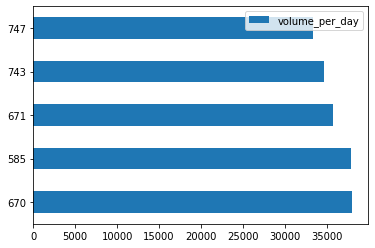

In [ ]:
df_5_records = df_volume_pd_sum.head()
df_5_records.plot(kind='barh')

In [ ]:
correlation = df.corr()
correlation

,vehicles_1,vehicles_2,volume_per_day,85th_percentile_speed
vehicles_1,1.000000,0.823876,0.953447,0.352604
vehicles_2,0.823876,1.000000,0.956438,0.342199
volume_per_day,0.953447,0.956438,1.000000,0.363696
85th_percentile_speed,0.352604,0.342199,0.363696,1.000000


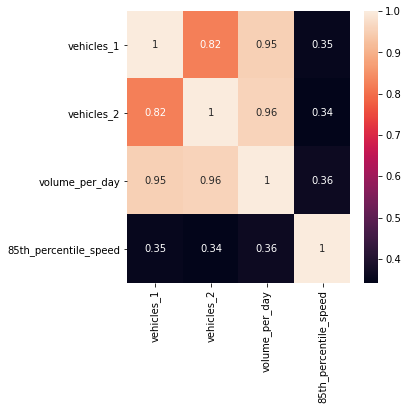

In [ ]:
# Visualization of correlation matrix heatmap 
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot = True)
plt.show()